In [1]:
# Code source: https://medium.com/@maryamuzakariya/project-predict-stock-prices-using-random-forest-regression-model-in-python-fbe4edf01664

In [2]:
# 1. IMPORT LIBRARIES

import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# 2. IMPORT THE DATASET

AAPL_stock_data = yf.download('AAPL', start='2021-08-15', end='2022-08-15')
AAPL_stock_data.head()

# We evaluated different strategies to store data, but in this model we are saving the pulled data to a csv file to store it locally and quickly load it into the algortith

AAPL_df = pd.DataFrame(AAPL_stock_data)
AAPL_df.to_csv("AAPL_data.csv")


[*********************100%***********************]  1 of 1 completed


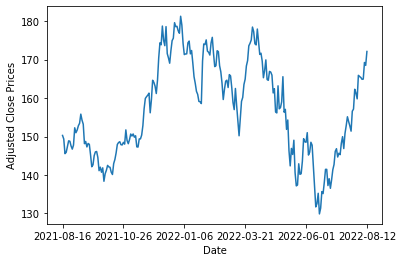

In [4]:
# 3. VISUALIZE THE DATA
# Plot a line chart of the adjusted close prices over time.

read_df = pd.read_csv("AAPL_data.csv")
read_df.set_index("Date", inplace=True)
read_df['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

In [20]:
# 4. DATA PRE-PROCESSING
# Clean the data so the algorithm can read it, we are going to remove missing or inconsistent values and change the index

# Step 4.1 : drop missing values

df = pd.read_csv("AAPL_data.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)

# Step 4.2 : select x and y variables, we use 5 features
# x: values for the open, high, low, close and adj-close columns
# y: adj-close column

x = df.iloc[:, 0:5].values
y = df.iloc[:, 4].values
#print(x)
#print(y)
y.shape

(251,)

In [6]:
# 4.3 DIVIDE DATA FOR TRAINING AND TESTING 
# Train: 30%
# Test: 70%

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0, shuffle=False)

In [7]:
# 5. STANDARIZE THE DATA
# This step is included to improve the training speed and add stability to the model 

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [8]:
#6. DEFINE THE MODEL 

model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)


[156.54345822 156.21165045 163.19642343 157.33443463 156.87777155
 158.93905151 165.47632401 156.40035397 156.65383221 151.76727377
 153.94372681 146.05146332 142.77560452 146.15365976 145.15749533
 148.69106268 142.00038013 139.13596207 139.1442359  142.13875555
 139.83322989 140.08881735 142.664073   148.60215524 148.33083058
 148.25586969 150.51962762 145.16871591 145.75863892 147.709461
 147.57602027 143.32975308 139.13596207 139.1442359  139.1442359
 139.1442359  139.1442359  139.1442359  139.1442359  139.1442359
 139.1442359  140.85272604 140.98796869 139.18033411 139.1442359
 139.1442359  139.1442359  140.43964151 142.27851013 145.55831125
 146.25725604 144.77748679 145.53195221 144.4045946  147.36151225
 149.59109958 146.66401865 150.39743802 152.47167044 154.3740683
 153.67588443 152.47313867 151.1890654  155.86445618 156.72452731
 162.1698551  161.1040881  159.66106613 165.68009894 165.40452139
 164.990491   164.6215495  164.60662271 168.75391934 168.34310312
 171.69903342]
(

In [9]:
# 7. DEFINITION OF PARAMETERS (HYPERPARAMETERS)
# This step is included to improve prediction of the model and to make the model more efficient

grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator = model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 2, 'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 11, 'bootstrap': False}


In [10]:
#Run the optimized model 

model = RandomForestRegressor(n_estimators=best_parameters['n_estimators'], random_state=42, 
                              min_samples_split=best_parameters['min_samples_split'], 
                              min_samples_leaf=best_parameters['min_samples_leaf'], 
                              max_depth=best_parameters['max_depth'], 
                              bootstrap=True, oob_score=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[156.49742813 156.27307205 163.24528656 157.38100815 157.08730927
 158.98777313 165.45351868 156.46273727 156.83492889 151.48319397
 153.86069412 145.84524689 142.86444702 146.16971664 145.26350021
 148.65798569 142.408004   139.03043365 139.03043365 142.02913132
 139.72553406 140.01938477 142.5223671  148.60849075 148.31540756
 148.35269928 150.52830276 145.23018799 145.86314163 147.7470871
 147.53892822 143.5864006  139.03043365 139.03043365 139.03043365
 139.03043365 139.03043365 139.03043365 139.03043365 139.03043365
 139.03043365 140.8069809  141.1291748  139.10004501 139.03043365
 139.03043365 139.03043365 140.14320221 142.34485931 145.54542313
 146.44815674 144.98705215 145.72044067 144.32724838 147.38461685
 149.50275955 146.86386032 150.34632339 152.61884384 154.34280701
 153.56497574 152.57206421 151.14719543 156.09412918 157.01690521
 162.08740616 161.05900421 159.57090759 165.59277115 165.37781067
 165.08820114 164.65262222 164.6291748  168.8210701  168.19989624
 171.566126

In [11]:
#Confidence intervals

# Generating the error distribution
resid = y_train - model.oob_prediction_
print(resid)

# 50% interval
lowq = np.quantile(resid,0.25)
higq = np.quantile(resid,0.75)
print((lowq,higq))

#Calculate the confidence value by applying the model to testing data
conf = model.score(x_test, y_test)
print(conf)

[ 1.51530675e-01  9.23736572e-02 -6.35919571e-01  3.99434408e-01
 -6.91477458e-03 -1.57653809e-01  2.06823730e-01  2.30092367e-01
 -6.00983938e-01 -3.97796631e-02 -6.36885071e-01  3.29165141e-01
  7.82299042e-02 -4.59142049e-01  1.28747940e-01 -1.05405807e-01
  1.52793037e-01 -6.34445190e-02 -1.29174805e-01 -1.56476974e-01
 -3.29492569e-01  1.40631539e-01  1.15814209e-02 -5.61859131e-01
  1.08137131e-01  3.33129883e-01 -2.64242990e-01 -2.08808899e-01
  1.41192627e-01 -3.95275116e-01  2.98503529e-02  1.98974609e-02
 -2.25392660e-01 -2.81753540e-02 -1.95900981e+00  1.37237549e-01
  1.12744713e+00 -1.10794067e-01 -5.66925049e-02 -1.98974609e-02
 -2.07181295e-01 -6.96233114e-02  5.13796488e-01  5.48350743e-01
  1.29271074e-01 -3.72772217e-02 -8.06664361e-02 -9.32273865e-02
 -1.56337193e-02 -3.85303497e-02 -1.16004096e-01  4.83224051e-02
  4.98576573e-01  1.19308472e-01  2.15555827e-02 -1.79959978e-01
  1.05726624e-01 -2.57321167e-01 -9.12971497e-02 -2.23350525e-01
 -1.41385760e-01 -1.42269

In [12]:
# 8. PERFORMANCE EVALUATION
# We tested with Mean absolute error MEA, Mean squared error MSE
# Fit is evaluated with R^2

print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.0244
Mean Squared Error: 4.1661
Root Mean Squared Error: 2.0411
(R^2) Score: 0.9596
Train Score : 99.99% and Test Score : 95.96% using Random Tree Regressor.
Accuracy: 99.26 %.


In [13]:
#Scale the data
x_scale = scale.transform(x)

In [14]:
#Fit the model again using the whole data set
all_data_prediction = model.predict(x_scale)
print(all_data_prediction)
len(all_data_prediction)

[150.22487259 149.33001022 145.79880142 145.76270752 147.36630173
 148.93097229 148.73454895 147.46425171 147.07845535 147.7838913
 152.58518143 150.88519821 151.62887955 152.9315506  153.38868637
 155.8590416  154.1769249  153.24319382 148.20447998 148.77925034
 147.42641373 148.1503334  147.95740204 145.41465149 142.10022354
 142.59743958 145.12974701 146.11623001 146.06600494 144.71806183
 141.10282974 142.02713928 140.77913513 141.86355515 138.95237274
 140.25506592 140.75776138 142.53032455 142.13204498 142.02017517
 140.78360519 140.14567337 142.80478439 143.84097519 145.66226883
 147.94597168 148.46456833 148.6843399  147.866922   147.8271492
 148.5401474  148.00365601 151.54533157 148.94735947 148.12349243
 149.24702225 150.59298019 150.18311996 150.67482986 149.887043
 150.2379921  147.31611557 147.3022377  149.2373024  149.34818878
 150.3006424  152.84484329 157.09873199 159.81740494 160.36984482
 160.79492416 161.25383301 156.50885086 159.64358444 164.58197708
 164.14125671 

251

In [15]:
# Predicted values

RF_all_data_prediction = pd.DataFrame({"Prediction": all_data_prediction}, index= pd.date_range(start= df.index[1], periods=len(all_data_prediction), freq="D"))
RF_all_data_prediction.index.name = 'Date'
RF_all_data_prediction.to_csv("Predicted_all_price_data.csv")

#oneyear_df = pd.DataFrame(all_data_prediction[:252])
#oneyear_df.index.name = 'Date'
#oneyear_df.to_csv("RF_all_data_prediction.csv")

In [16]:
import time
start_time = time.time()
model = RandomForestRegressor(n_estimators=best_parameters['n_estimators'], random_state=42, 
                              min_samples_split=best_parameters['min_samples_split'], 
                              min_samples_leaf=best_parameters['min_samples_leaf'], 
                              max_depth=best_parameters['max_depth'], 
                              bootstrap=True, oob_score=True),0
0,150.2110944671631
1,149.34981184387206
2,145.77963331604005
3,145.88829299926758
4,147.30242343139648
5,148.86859007263183
6,148.76472705078126
7,147.47341618347167
8,146.91844061279298
9,147.7864532928467
10,152.28086805725098
11,150.89663031005858
12,151.8591081237793
13,152.84832305908202
14,153.28475321960448
15,155.7615249786377
16,154.27309178161622
17,153.35813278198242
18,148.3354420776367
19,148.7446944732666
20,147.33028092956542
21,148.14460585021973
22,147.93476489257813
23,145.37130584716797
24,142.13170922851563
25,142.6295217437744
26,145.02922103881835
27,145.99345928955077
28,146.02531323242187
29,144.70178729248047
30,141.13421798706054
31,142.04765084838868
32,140.73871157836913
33,141.87266856384278
34,139.09167378234864
35,140.32449034118653
36,140.84429586791993
37,142.47938046264647
38,142.1454229888916
39,142.0437953491211
40,140.71636163330078
41,140.18827473449707
42,142.70965074157715
43,144.01810957336426
44,145.55458253479003
45,147.91804290771483
46,148.45603523254394
47,148.66806050109864
48,147.87125567626953
49,147.8244608001709
50,148.51530612182617
51,148.00559532165528
52,151.6680149230957
53,148.90729606628418
54,148.13027001953125
55,149.24473495483397
56,150.5970278930664
57,150.18811262512207
58,150.5847703857422
59,149.90177743530273
60,150.1925782775879
61,147.32602087402344
62,147.28003186035156
63,149.28904345703126
64,149.38709753417967
65,150.29355964660644
66,152.74180662536622
67,156.84597988891602
68,159.9017289581299
69,160.4231171569824
70,160.81612284851073
71,161.21876443481446
72,156.39257929992675
73,159.62319245910643
74,164.59696766662597
75,164.13415991210937
76,163.03194927978515
77,161.2256834716797
78,164.66420671081542
79,170.40962338256836
80,174.36058938598632
81,173.8803465423584
82,178.59663360595704
83,175.1315439605713
84,173.70140536499022
85,178.478208694458
86,171.5657979888916
87,170.50162339782716
88,169.1447177429199
89,172.19417567443847
90,174.95396926879883
91,175.5337946624756
92,179.26767588806152
93,178.58642073059082
94,178.65788984680177
95,177.55754652404786
96,177.0188472595215
97,180.59131457519533
98,178.9449571838379
99,174.2942071990967
100,171.3434400482178
101,171.46957722473144
102,171.35231581115724
103,174.35983001708985
104,174.87829150390624
105,171.48895195007324
106,172.29917420959472
107,169.23027589416503
108,165.63024359130858
109,163.90019078063966
110,161.76990347290038
111,160.944078125
112,159.09459414672853
113,159.03866313171386
114,158.71302563476561
115,169.61341819763183
116,174.11268196105956
117,173.90705519104003
118,175.0673541107178
119,172.1903453216553
120,171.86132579040526
121,171.24090476989747
122,174.3050108947754
123,175.61590711975097
124,171.6084185028076
125,168.29079550170897
126,168.31954655456542
127,172.25868742370605
128,172.0702219696045
129,168.41332942199708
130,166.86206268310548
131,163.85458651733398
132,159.60914614868165
133,162.2970127105713
134,164.35307218933104
135,164.63051579284667
136,162.6866134033203
137,165.89656341552734
138,165.7569197845459
139,162.68216571044923
140,158.89553285217286
141,157.0695235595703
142,162.44861734008788
143,158.0640254058838
144,154.58557299804687
145,150.25844242858886
146,154.1544602661133
147,158.92043563842773
148,160.07940615844726
149,163.4858199157715
150,164.82095791625977
151,168.19796849060057
152,169.70273048400878
153,173.64474638366698
154,174.19647401428222
155,175.0411320953369
156,178.48720347595216
157,177.28240742492676
158,174.0826052093506
159,173.78544012451172
160,177.71565240478515
161,174.49260629272462
162,171.32828143310547
163,171.60094340515136
164,169.695543548584
165,165.24951693725586
166,167.13068144226074
167,169.7988480834961
168,164.85394799804686
169,164.61844718933105
170,166.76987045288087
171,166.81499491882323
172,165.9332760620117
173,161.3332452545166
174,162.4245739593506
175,156.54929739379884
176,156.21506121826172
177,163.17777000427247
178,157.34025910949708
179,156.86483012390136
180,158.94530004882813
181,165.4794437713623
182,156.40087628173828
183,156.65674949645995
184,151.77016773986816
185,153.94404988098145
186,146.04471781921387
187,142.7108835144043
188,146.10366481018067
189,145.15426895141601
190,148.6858298034668
191,141.865283203125
192,139.12164624023438
193,139.12863705444335
194,142.1239013519287
195,139.83752795410157
196,140.0752068634033
197,142.6676805114746
198,148.5750687866211
199,148.34348963928224
200,148.2650089111328
201,150.5050714416504
202,145.1518697052002
203,145.73204393005372
204,147.7150770263672
205,147.56950393676757
206,143.21840034484865
207,139.12164624023438
208,139.12863705444335
209,139.12863705444335
210,139.12863705444335
211,139.12863705444335
212,139.12863705444335
213,139.12863705444335
214,139.12863705444335
215,139.12863705444335
216,140.83519676208496
217,140.984806930542
218,139.20182678222656
219,139.12863705444335
220,139.12863705444335
221,139.12863705444335
222,140.4295687866211
223,142.25347135925293
224,145.54146272277833
225,146.26128225708007
226,144.78300527954102
227,145.51346969604492
228,144.36085304260254
229,147.33693118286132
230,149.60126373291016
231,146.65861015319825
232,150.3773607635498
233,152.457433883667
234,154.38443446350098
235,153.7188772125244
236,152.51162965393067
237,151.17973083496094
238,155.8880859069824
239,156.70937648010255
240,162.1596813964844
241,161.11005728149414
242,159.65593661499022
243,165.67363491821288
244,165.40628343200683
245,165.03413554382325
246,164.62543850708008
247,164.62741461181642
248,168.76766033935547
249,168.3401799621582
250,171.69780714416504



time.sleep(1)
print("--- %s seconds to train ---" % (time.time() - start_time))

start_time = time.time()
model.fit(x_train, y_train)
predict = model.predict(x_test)

time.sleep(1)
print("--- %s seconds to predict ---" % (time.time() - start_time))

--- 1.009037971496582 seconds to train ---


AttributeError: 'tuple' object has no attribute 'fit'

[CV] END bootstrap=False, max_depth=9, min_samples_leaf=11, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.1s
[CV] END bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=9, n_estimators=100, random_state=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=12, min_samples_leaf=1, min_samples_split=9, n_estimators=20, random_state=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=12, min_samples_leaf=1, min_samples_split=9, n_estimators=20, random_state=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=11, min_samples_split=9, n_estimators=20, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=500, random_state=42; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=11, min_samples_split=10, n_estimators=500, random_state=1; total time=   0.9s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=9, min_sampl

[CV] END bootstrap=False, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=500, random_state=30; total time=   0.7s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=500, random_state=42; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=11, min_samples_split=10, n_estimators=500, random_state=1; total time=   0.9s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=100, random_state=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=100, random_state=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=9, n_estimators=500, random_state=2; total time=   1.0s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=3, min_samples_split=9, n_estimators=50, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, min_samples_leaf=7, min

[CV] END bootstrap=False, max_depth=9, min_samples_leaf=11, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.1s
[CV] END bootstrap=False, max_depth=13, min_samples_leaf=11, min_samples_split=9, n_estimators=20, random_state=42; total time=   0.0s
[CV] END bootstrap=False, max_depth=13, min_samples_leaf=11, min_samples_split=9, n_estimators=20, random_state=42; total time=   0.0s
[CV] END bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=10, n_estimators=20, random_state=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=9, min_samples_split=9, n_estimators=20, random_state=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, random_state=42; total time=   0.1s
[CV] END bootstrap=False, max_depth=13, min_samples_leaf=11, min_samples_split=10, n_estimators=1000, random_state=30; total time=   1.4s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=9,

[CV] END bootstrap=False, max_depth=9, min_samples_leaf=11, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.1s
[CV] END bootstrap=False, max_depth=13, min_samples_leaf=11, min_samples_split=9, n_estimators=20, random_state=42; total time=   0.0s
[CV] END bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=10, n_estimators=20, random_state=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=10, n_estimators=20, random_state=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=9, min_samples_split=9, n_estimators=20, random_state=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, random_state=42; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=500, random_state=42; total time=   0.7s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=13, mi

[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=20, random_state=42; total time=   0.0s
[CV] END bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=9, n_estimators=100, random_state=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, random_state=42; total time=   0.1s
[CV] END bootstrap=False, max_depth=13, min_samples_leaf=11, min_samples_split=10, n_estimators=1000, random_state=30; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=11, min_samples_split=10, n_estimators=500, random_state=1; total time=   0.9s
[CV] END bootstrap=True, max_depth=14, min_samples_leaf=3, min_samples_split=2, n_estimators=500, random_state=42; total time=   1.0s
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=13, min_samples_split=2, n_estimators=100, random_state=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, min_samples_leaf=